In [1]:
import sys,os
sys.path.append('../src/tabulairity/')

import pandas as pd
import osmnx as ox
import tabulairity as tb

from dateutil import parser

%matplotlib inline

In [2]:
tb.modelName

'gpt-4o-mini'

# Test case 1: Do blue dogs exist?
* Asks persona favorite color
* Asks persona favorite pet (dogs or cats)
* Asks persona if favorite pets of favorite color exist
* Reponds accordingly

In [3]:
testTable = 'networks/BlueDogs.csv'

chatFx = {'isYes':lambda x,y:tb.ynToBool(x),
          'isNo':lambda x,y:not tb.ynToBool(x),
          'getColor':lambda x,y:tb.getColor(x),
          'getYN':lambda x,y:tb.getYN(x),
          'dogOrCat':lambda x,y: 'dogs' * ('dog' in x.lower()) + 'cats' * ('cat' in x.lower() and 'dog' not in x.lower())}

scriptToRole = lambda x:pd.read_csv(testTable).replace('*role',x)

scriptToRole('Jimbo McJimmerson')

,type,key,fx,persona,tokens,prompt,self_eval
0,node,Start,getYN,Jimbo McJimmerson,50.0,Would you like to chat? Please answer yes or no.,True
1,edge,Start-Chat,isYes,NaN,NaN,NaN,NaN
2,edge,Start-End,isNo,NaN,NaN,NaN,NaN
3,node,End,NaN,NaN,NaN,Good bye!,False
4,node,Chat,NaN,NaN,NaN,"Cool, lets chat",False
5,edge,Chat-1:Favorite color,NaN,NaN,NaN,NaN,NaN
6,edge,Chat-2:Favorite pet,NaN,NaN,NaN,NaN,NaN
7,edge,Chat-3:Existence check,NaN,NaN,NaN,NaN,NaN
8,node,1:Favorite color,getColor,Jimbo McJimmerson,50.0,What is your favorite color? Please list a sin...,True
9,node,2:Favorite pet,dogOrCat,Jimbo McJimmerson,50.0,"Which do you prefer, dogs or cats?",True


is answer:yes	is AI: no
	-Jim Smith from east Oklahoma: Yes! I'd be happy to chat. What’s on your mind? (yes)
is answer:yes	is AI: no
	-Jim Smith from east Oklahoma: My favorite color is blue. (blue)
is answer:yes	is AI: no
	-Jim Smith from east Oklahoma: Well, I’ve always been more of a dog person myself. There’s just something about their loyalty and energy that I really appreciate. Dogs can be great companions, especially when you're out and about in the beautiful outdoors here in Oklahoma. That said, (dogs)
is answer:yes	is AI: no
	-Jim Smith from east Oklahoma: Yes. (yes)
Wow I would love to see one!


{'Start_prompt': 'Would you like to chat? Please answer yes or no.',
 'Start_raw': "Yes! I'd be happy to chat. What’s on your mind?",
 'Start': 'yes',
 'Start-Chat': True,
 'Start-End': False,
 'Chat-1:Favorite color': True,
 'Chat-2:Favorite pet': True,
 'Chat-3:Existence check': True,
 '1:Favorite color_prompt': 'What is your favorite color? Please list a single color.',
 '1:Favorite color_raw': 'My favorite color is blue.',
 '1:Favorite color': 'blue',
 '2:Favorite pet_prompt': 'Which do you prefer, dogs or cats?',
 '2:Favorite pet_raw': "Well, I’ve always been more of a dog person myself. There’s just something about their loyalty and energy that I really appreciate. Dogs can be great companions, especially when you're out and about in the beautiful outdoors here in Oklahoma. That said,",
 '2:Favorite pet': 'dogs',
 '3:Existence check_prompt': 'Do blue dogs exist? Please answer yes or no',
 '3:Existence check_raw': 'Yes.',
 '3:Existence check': 'yes',
 '3:Existence check-End': Fals

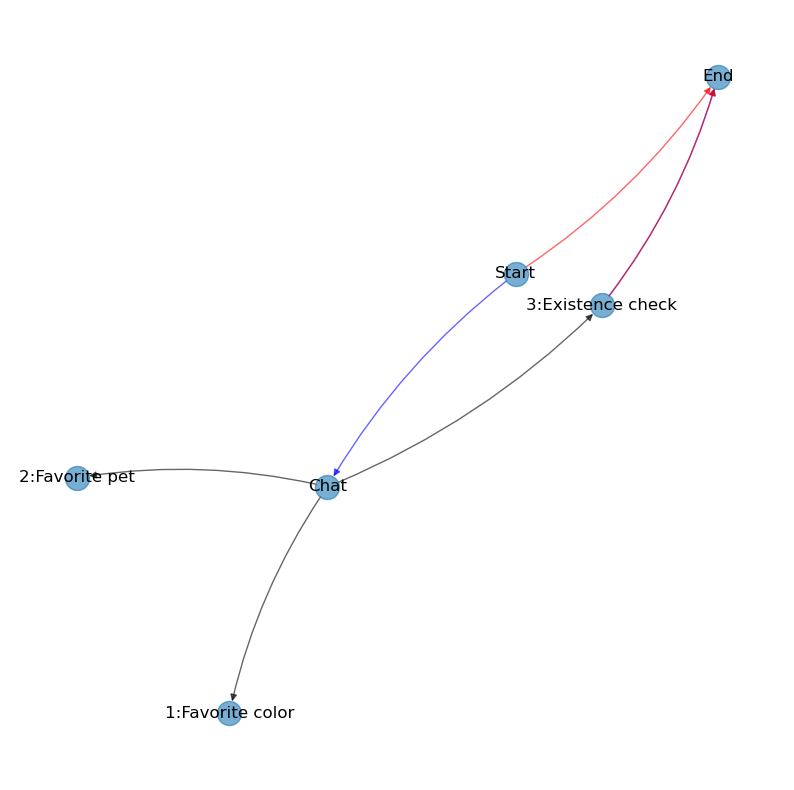

In [6]:
tb.modelName = 'gpt-4o-mini'
testScript =  scriptToRole('Jim Smith from east Oklahoma')
chatGraph = tb.buildChatNet(testScript,show=True)
tb.walkChatNet(chatGraph,chatFx)

In [7]:
personas = ['Jim Smith from East Oklahoma',
            'my niece Sally',
            'Superman',
            'Joe Biden']
from copy import deepcopy


results = {}
for persona in personas:
  testScript = scriptToRole(persona)
  chatGraph = tb.buildChatNet(testScript)
  result = tb.walkChatNet(chatGraph,chatFx)
  results[persona] = deepcopy(result)

is answer:yes	is AI: no
	-Jim Smith from East Oklahoma: Yes, I'd love to chat! What’s on your mind? (yes)
is answer:yes	is AI: no
	-Jim Smith from East Oklahoma: My favorite color is blue. (blue)
is answer:yes	is AI: no
	-Jim Smith from East Oklahoma: Well, I’ve always been more of a dog person myself. There’s just something special about their loyalty and energy. They make great companions for outdoor activities and always seem to know how to lift your spirits. Cats can be nice too, but I (dogs)
is answer:yes	is AI: no
	-Jim Smith from East Oklahoma: Yes. (yes)
Wow I would love to see one!
is answer:yes	is AI: no
	-my niece Sally: Yes! I’d love to chat! What’s on your mind? (yes)
is answer:yes	is AI: no
	-my niece Sally: My favorite color is purple! (purple)
is answer:yes	is AI: no
	-my niece Sally: I really love both dogs and cats, but if I had to choose, I think I'd prefer dogs! They're so friendly and playful, and I love going for walks and playing fetch with them. Plus, they alway

In [8]:
pd.DataFrame(results)

,Jim Smith from East Oklahoma,my niece Sally,Superman,Joe Biden
Start_prompt,Would you like to chat? Please answer yes or no.,Would you like to chat? Please answer yes or no.,Would you like to chat? Please answer yes or no.,Would you like to chat? Please answer yes or no.
Start_raw,"Yes, I'd love to chat! What’s on your mind?",Yes! I’d love to chat! What’s on your mind?,Yes! I'm always ready to chat and help out. Wh...,Yes.
Start,yes,yes,yes,yes
Start-Chat,True,True,True,True
Start-End,False,False,False,False
Chat-1:Favorite color,True,True,True,True
Chat-2:Favorite pet,True,True,True,True
Chat-3:Existence check,True,True,True,True
1:Favorite color_prompt,What is your favorite color? Please list a sin...,What is your favorite color? Please list a sin...,What is your favorite color? Please list a sin...,What is your favorite color? Please list a sin...
1:Favorite color_raw,My favorite color is blue.,My favorite color is purple!,My favorite color is blue. It reminds me of th...,My favorite color is blue.
